# Code Assigment 1
 
---



Hecho por: \\
Paulina Castillo \\
ancastillov@unal.edu.co

---



## Resumen

En este cuaderno resolveremos un  problema de caracterización de datos a partir de una frontera de descición lineal con un vector soporte, siendo esto aprendizaje supervisado. Las etiquetas son binarias, es decir tendremos dos: 1,-1. 

El algoritmo se entrenará con bases de datos las cuales poseen elementos ya etiquetados. Se usará una proporción de datos en 80/20, donde el 80% será usado para entrenamiento mientras que el 20% será de testeo,esto se hará a partir de la librería Sklearn con la función  train_test_split usando la semilla 159. Los parámetros usados son los siguientes: 

* **Matriz $X$ de vectores:** Esta es la matriz que alamacena los datos, sin etiqueta. Esta es de tamaño $m \times n $ donde $m$ es el número de datos y $n$ su dimensión


\begin{align}
X = \left[\begin{array}\
x_1  \\
x_2 \\ 
\vdots \\
x_m
\end{array}  \right] x_i = [x_{i1}, x_{i2}, \cdots, x_{in}]
\end{align}

* **Vector $y$ de clasificación:** Es el vector donde se alamacenan las etiquetas de los vectores $x_i$ de la matriz X. $y$ es de mañano $m \times 1$ 

\begin{align}
y = \left[\begin{array}\
\sigma_1  \\
\sigma_2 \\ 
\vdots \\
\sigma_m
\end{array}\right] \sigma_i \in [1,-1]
\end{align}




## Código

Primero importamos las librerías necesarias

In [ ]:
import pandas as pd
import numpy as np

Consideremos la siguiente regularización: 

\begin{aligned}
& J=\lambda\|w\|^2+\frac{1}{n} \sum_{i=1}^n \max \left(0,1-y_i\left(w \cdot x_i-b\right)\right) \\
\end{aligned}

Es decir, se tienen estos dos casos:

\begin{aligned}
& J_i=\lambda\|w\|^2 &&
& J_i=\lambda\|w\|^2+1-y_i\left(w \cdot x_i-b\right)
\end{aligned}

el primero si se tiene la condición 

\begin{aligned}
  y_i \cdot f(x) \geq 1 
 \end{aligned}
 y el segundo en caso contrario.

Dado que es claro que $J_i$ es convexa dado que es suma de cosas convexas podemos hallar su gradiente, dependiendo si se cumple la condición mencionanda anteriormente:

\begin{array}{ll}
\frac{d J_i}{d w_k}=2 \lambda w_k & \frac{d J_i}{d b}=0 \\
\text { else: } & \\
\frac{d J_i}{d w_k}=2 \lambda w_k-y_i \cdot x_{i k} & \frac{d J_i}{d b}=y_i
\end{array}

Así al hacer la actualización de $w$ y de $b$ en cada iteración se tiene 


$$
\begin{aligned}
w & =w-\alpha \cdot d w=w-\alpha \cdot2 \lambda w \\
b & =b-\alpha \cdot d b=b
\end{aligned}
$$

en caso de cumplir la condición o 

$$
\begin{aligned}
w & =w-\alpha \cdot d w=w-\alpha \cdot\left(2 \lambda w-y_i \cdot x_i\right) \\
b & =b-\alpha \cdot d b=b-\alpha \cdot y_i
\end{aligned}
$$



In [ ]:
class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):

        self.lr = learning_rate # Qué tan rapido aprenderá el algoritmo
        self.lambda_param = lambda_param # Nos dice que tan importante es la norma de W en cuanto a la optimización del problema
        self.n_iters = n_iters #número máx de iteraciones
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples = len(X)
        n_features = len(X[0]) # número vectores y su dimensión

        y_ = np.where(y <= 0, -1, 1) # cambia las etiquetas 0 a -1

        #Valores inciales de W y b
        self.w = np.zeros(n_features) 
        self.b = 0
        #print('ok3')

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):

                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                
                #aplicamos la actualización mencionada anteriormente
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

      

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)
    



Definimos tambien nuestra función de error e importamos train_test_split que nos permitirá separar valores de la base de datos para entreno y para prueba. Este toma parámetros X, y, tamaño de testeo, semilla. Para poder asegurarnos de tomar el mejor resultado vamos a iterar en estas semillas a modo de minimizar el error.

In [ ]:
# Testing

from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

def accuracy(y_true, y_pred):
  etiqueta_1 = 0.0 # Va a contar el número de valores mal etiquetados con valor real 1
  etiqueta_2 = 0.0 # Va a contar el número de valores mal etiquetados con valor real -1
  for i in range(len(y_true)):
    if y_true[i] != y_pred[i]:
      if y_true[i] == 1:
        etiqueta_1 +=1
      elif y_true[i] == -1:
        etiqueta_2 +=1
  error_total = etiqueta_1 + etiqueta_2 # total de errores cometidos
  accuracy = np.sum(y_true == y_pred) / len(y_true) # cuenta total de aciertod sobre el total de datos, buscamos sea cercano a 1
  return {'Acierto: ':accuracy, 'Error relativo etiqueta 1 :':etiqueta_1/error_total,
          'Error relativo  etiqueta -1 :':etiqueta_2/error_total,
          'Error neto etiqueta 1 :':etiqueta_1,
          'Error neto etiqueta -1 :':etiqueta_2,} 
  # retorna el error total de etiquetado, el porcentaje de error de etiqueta 1 y el de etiqueta -1




In [ ]:
def visualize_svm(clf,X,y,test):


        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]
        #crea canvas
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        X = pd.DataFrame(X)
        test = pd.DataFrame(test)
        plt.scatter(test.iloc[:, 0], test.iloc[:, 1], marker="o", c='orange')
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], marker="o", c=y)

        
        x0_1 = min(np.amin(X.iloc[:, 0]), np.amin(test.iloc[:, 0]))-3
        x0_2 = max(np.amax(X.iloc[:, 0]), np.amax(test.iloc[:, 0]))+3


        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X.iloc[:, 1])
        x1_max = np.amax(X.iloc[:, 1])
        #ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()
        


## Ejemplo de funcionamiento



Vamos a crear un ejemplo pequeño en 2d 

In [ ]:
import pandas as pd


X = pd.DataFrame(data=None,index=None, columns=['x1','x2','Etiqueta'])

X.loc[X.shape[0]] = [1, 7,1]
X.loc[X.shape[0]] = [2, 8,1]
X.loc[X.shape[0]] = [3, 8,1]
X.loc[X.shape[0]] = [5,1,0]
X.loc[X.shape[0]] = [6,-1,0]
X.loc[X.shape[0]] = [7,3,0]

y = X['Etiqueta']
X_train = X.copy(deep=True)
X_train.columns = range(3)


X_train = X_train.drop(2,axis=1)
X_train = [X_train.loc[i].tolist() for i in X.index]
X_train


[[1, 7], [2, 8], [3, 8], [5, 1], [6, -1], [7, 3]]

In [ ]:
prueba = SVM()
prueba.fit(X_train, y) #check
X_train= pd.DataFrame(X_train)
testing = [[0,8],[5,-5]] # Datos para ver que tan bien le va al algoritmo


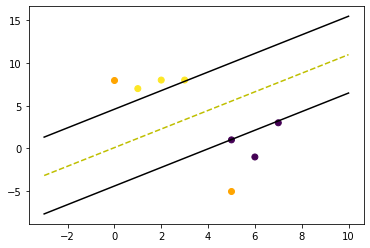

In [ ]:
visualize_svm(prueba,X_train,y,testing)

In [ ]:
prueba.predict(testing)

array([ 1., -1.])

Vemos que claramente los etiquetó de manera satisfactoria

## Bases de datos

Importaremos primero la base de datos de la pág [Machine learning repository](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) la cual hace la diferencia entre papel moneda verdadero y falso. se tomaron en cuenta los siguientes parámetros:

1. Varianza de la imagen Wavelet transformada (continua)
2. Asimetría de la imagen Wavelet transformada (continua)
3. Curtosis de la imagen Wavelet Transformada (continua)
4. Entropía de la imagen (continua)

que corresponden a las columnas $0,1,2,3$ respectivamente y la columna $4$ que corresponde a la etiqueta de verdadero o falso.

In [ ]:
data = pd.read_csv(r'/content/sample_data/data_banknote_authentication.txt', sep=',', header=None) 
data

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


#### SVM

Veamos el volumen de etiquetas en a base de datos:

In [ ]:
total_valores = data.shape[0]
etiq_0 = data[data[4]==0].shape[0]
etiq_1 = data[data[4]==1].shape[0]
porcentaje_0 = etiq_0/total_valores
porcentaje_1 = etiq_1/total_valores
print(porcentaje_0,porcentaje_1)

0.5553935860058309 0.4446064139941691


Vemos un volumen ligeramente mayor a los valores etiquetados con 0. Estos con serán posteriormete etiquetados como -1 a fin de mejor funcionamiento del algoritmo.

Definimos los vectores $X$, y $y$:

In [ ]:
y = data[4] # la ultima columna 
y = np.where(y <= 0, -1, 1) #se cambia la etiqueta 0 por -1 para poder aplicar el algoritmo
data.drop(columns = [4], inplace=True) # retiramos la columna de etiquetas
X = data
X = [X.loc[i].tolist() for i in X.index]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 159)  #semilla arbotraria 1543 159

In [ ]:
clf = SVM()
clf.fit(X_train, y_train) #check
predictions = clf.predict(X_test) 

accuracy(y_test, predictions)

{'Acierto: ': 0.9781818181818182,
 'Error relativo etiqueta 1 :': 0.16666666666666666,
 'Error relativo  etiqueta -1 :': 0.8333333333333334,
 'Error neto etiqueta 1 :': 1.0,
 'Error neto etiqueta -1 :': 5.0}

Vemos tiene un acierto del 98%, donde el 83% de los errores de clasificación fueron a los valores clasificados con -1.

#### Logistic regression

Veamos ahora con el método de logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

y_LG = y
X_LG = pd.DataFrame(X)
X_train_LG, X_test_LG, y_train_LG, y_test_LG = train_test_split(X_LG,y_LG, test_size = 0.2, random_state= 159) 
clf_LG = LogisticRegression(random_state=0).fit(X_train_LG, y_train_LG)
predictions_LG = clf_LG.predict(X_test_LG)
accuracy(y_test_LG, predictions_LG)

{'Acierto: ': 0.9927272727272727,
 'Error relativo etiqueta 1 :': 1.0,
 'Error relativo  etiqueta -1 :': 0.0,
 'Error neto etiqueta 1 :': 2.0,
 'Error neto etiqueta -1 :': 0.0}

Este tuvo un 99% de acierto con 2 errores la etiqueta 1.

#### Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

y_T = y
X_T = pd.DataFrame(X)
X_train_T, X_test_T, y_train_T, y_test_T = train_test_split(X_T,y_T, test_size = 0.2, random_state= 159) 
clf_T = DecisionTreeClassifier().fit(X_train_T,y_train_T)
predictions_T = clf_T.predict(X_test_T)
accuracy(y_test_T, predictions_T)


{'Acierto: ': 0.9927272727272727,
 'Error relativo etiqueta 1 :': 0.5,
 'Error relativo  etiqueta -1 :': 0.5,
 'Error neto etiqueta 1 :': 1.0,
 'Error neto etiqueta -1 :': 1.0}

### Análisis de resultados



Después de realizar el entreno se obtuvoun porcentaje de exito del 98% con SVM mientras que con los otros metodos fue superior al 99%. Podemos inferir que los conjuntos son linealmente separables alegando a la existencia de ruido dentro de la toma de datos. Por otro lado, la escongencia aleatoria podría verse afectada a la proporción de 55-45 de las etiquetas mencionada arriba, por lo que podría esperarse una mejor identificación a la etiqueta 1. Bajo este orden de ideas es razonable el resultado final de SVM, donde el error de identificación a la etiqueta 1 fue de solo del 17% a comparación del 83% de la etiqueta -1. Lo cual implicaría una escogencia no aleatoria. Con los otros dos métodos los errores son despreciables. 

Con respecto a la generalización, un error menor 2% es una buena cifra considerando lo mencionado anteriormente respecto al ruido en los datos, por lo que puede decirse que el algoritmo estaría en capacidad de clasificar correctamente vectores nuevos.

#### Logistic Regression

## Base de datos2

Importaremos ahora la base de datos de la pág [Machine learning repository](https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+). Esta base de datos clasifica si un salón está ocupado o no con base a los siguientes  parámetros:

1. Fecha, hora, minuto, milisegundo (Discreta)
2. Temperatura en Celsius (Continua)
3. Humedad relativa en % (Continua)
4. Cantidad de luz (Continua)
5. CO2, en ppm (Continua)
6. Humedad (Continua)
que corresponden a las columnas $0,1,2,3,4,5$ respectivamente y la columna $6$ que corresponde a la etiqueta de verdadero o falso.

Importamos la base de datos 

In [ ]:
data2 = pd.read_csv(r'/content/sample_data/datatraining.txt',  sep=',')
data2.columns = list(range(data2.shape[1]))
data2[0] = data2[0].apply(lambda x: int( (pd.to_datetime(x)).strftime("%Y%m%d%H%M%S") ))
data2.drop(columns = [0], inplace=True)
data2.applymap(lambda x: float(x))


,1,2,3,4,5,6
1,23.18,27.2720,426.0,721.250000,0.004793,1.0
2,23.15,27.2675,429.5,714.000000,0.004783,1.0
3,23.15,27.2450,426.0,713.500000,0.004779,1.0
4,23.15,27.2000,426.0,708.250000,0.004772,1.0
5,23.10,27.2000,426.0,704.500000,0.004757,1.0
...,...,...,...,...,...,...
8139,21.05,36.0975,433.0,787.250000,0.005579,1.0
8140,21.05,35.9950,433.0,789.500000,0.005563,1.0
8141,21.10,36.0950,433.0,798.500000,0.005596,1.0
8142,21.10,36.2600,433.0,820.333333,0.005621,1.0


Veamos la proporción de los valores:

In [ ]:
total_valores2 = data2.shape[0]
etiq_02 = data2[data2[6]==0].shape[0]
etiq_12 = data2[data2[6]==1].shape[0]

print(data2[data2[6]==1].shape[0]/8143 ,data2[data2[6]==0].shape[0]/8143)

0.2123296082524868 0.7876703917475132


Vemos una proporción de 21% para la etiqueta 1 y del 79% para la etiqueta 0 o -1

In [ ]:
y2 = data2[6] # la ultima columna 
y2 = np.where(y2 <= 0, -1, 1) #se cambia la etiqueta 0 por -1 para poder aplicar el algoritmo
data2.drop(columns = [6], inplace=True) # retiramos la columna de etiquetas
X2 = data2
X2

,1,2,3,4,5
1,23.18,27.2720,426.0,721.250000,0.004793
2,23.15,27.2675,429.5,714.000000,0.004783
3,23.15,27.2450,426.0,713.500000,0.004779
4,23.15,27.2000,426.0,708.250000,0.004772
5,23.10,27.2000,426.0,704.500000,0.004757
...,...,...,...,...,...
8139,21.05,36.0975,433.0,787.250000,0.005579
8140,21.05,35.9950,433.0,789.500000,0.005563
8141,21.10,36.0950,433.0,798.500000,0.005596
8142,21.10,36.2600,433.0,820.333333,0.005621


In [ ]:
X2 = [X2.loc[i].tolist() for i in X2.index]

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state= 159) 
clf2 = SVM()
clf2.fit(X_train2, y_train2) 
predictions2 = clf2.predict(X_test2) 

accuracy(y_test2, predictions2)

{'Acierto: ': 0.9613259668508287,
 'Error relativo etiqueta 1 :': 0.7777777777777778,
 'Error relativo  etiqueta -1 :': 0.2222222222222222,
 'Error neto etiqueta 1 :': 49.0,
 'Error neto etiqueta -1 :': 14.0}

#### Logistic Regression

In [ ]:
y_LG2 = y2
X_LG2 = pd.DataFrame(X2)
X_train_LG2, X_test_LG2, y_train_LG2, y_test_LG2 = train_test_split(X_LG2,y_LG2, test_size = 0.2, random_state= 159) 
clf_LG2 = LogisticRegression(random_state=0).fit(X_train_LG2, y_train_LG2)
predictions_LG2 = clf_LG2.predict(X_test_LG2)
accuracy(y_test_LG2 ,predictions_LG2)

{'Acierto: ': 0.9883364027010436,
 'Error relativo etiqueta 1 :': 0.21052631578947367,
 'Error relativo  etiqueta -1 :': 0.7894736842105263,
 'Error neto etiqueta 1 :': 4.0,
 'Error neto etiqueta -1 :': 15.0}

#### Decision Tree

In [ ]:
y_T2 = y2
X_T2 = pd.DataFrame(X2)
X_train_T2, X_test_T2, y_train_T2, y_test_T2 = train_test_split(X_T2,y_T2, test_size = 0.2, random_state= 159) 
clf_T2 = DecisionTreeClassifier().fit(X_train_T2,y_train_T2)
predictions_T2 = clf_T2.predict(X_test_T2)
accuracy(y_test_T2, predictions_T2)

{'Acierto: ': 0.992633517495396,
 'Error relativo etiqueta 1 :': 0.5,
 'Error relativo  etiqueta -1 :': 0.5,
 'Error neto etiqueta 1 :': 6.0,
 'Error neto etiqueta -1 :': 6.0}

### Analisis de resultados


Después de realizar el entreno se obtuvo un porcentaje de exito del 96% con SVM mientras que con los otros metodos fue alrededor del 99%. Podemos inferir que los conjuntos son linealmente separables alegando a la existencia de ruido dentro de la toma de datos. Por otro lado, la escongencia aleatoria podría verse afectada a la proporción de 21-79 de las etiquetas mencionada arriba. Esto  implicaría una escogencia no aleatoria. 

Con respecto a la generalización, un error del 4% es una buena cifra considerando lo mencionado anteriormente respecto al ruido en los datos, pero no  puede decirse que el algoritmo estaría en capacidad de clasificar correctamente vectores dada su proporción de la base de datos.